### From excel sheet to feature classes using pandas and geopandas

In [48]:
import pandas as pd, geopandas as gpd ,matplotlib.pyplot as plt
import folium
from shapely.geometry import Point
import contextily as ctx
path = r'C:\Users\asifi\Downloads\gb.csv'
df = pd.read_csv(path)        # creating geodataframe
df.head()                     # displaying first few rows              

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,London,51.5072,-0.1275,United Kingdom,GB,"London, City of",primary,11262000,8825001
1,Birmingham,52.4800,-1.9025,United Kingdom,GB,Birmingham,NaN,2919600,1137100
2,Manchester,53.4794,-2.2453,United Kingdom,GB,Manchester,NaN,2705000,547627
3,Liverpool,53.4075,-2.9919,United Kingdom,GB,Liverpool,NaN,864122,513441
4,Portsmouth,50.8058,-1.0872,United Kingdom,GB,Portsmouth,NaN,855679,248440


#### Creating geodataframe
* displaying , crs = wgs84

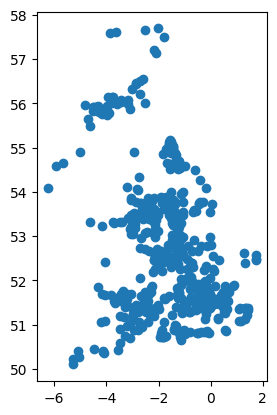

In [49]:
geometry = [Point(xy) for xy in zip(df["lng"],df["lat"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
gdf.plot();

#### categorizing map based on a unique feilds

c:\Users\asifi\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


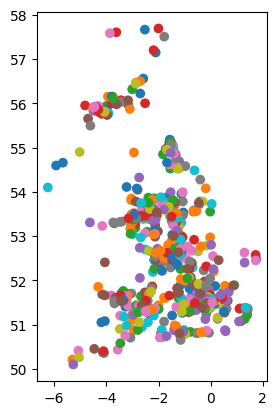

In [66]:
gdf.plot(column= "city");

#### Open street map using folium library

In [70]:
m = folium.Map(tiles = 'openstreetmap', zoom_starts = 2)
m

#### Overlaying gdf on openstreet map

In [71]:
center_latitude = gdf['lat'].mean()
center_longitude = gdf['lng'].mean()

my_map = folium.Map(location=[center_latitude, center_longitude], zoom_start=10) # Create a Folium map
folium.TileLayer('openstreetmap').add_to(my_map) # Add OpenStreetMap as a base layer
gdf_json = gdf.to_json() # Convert GeoDataFrame to GeoJSON
folium.GeoJson(gdf_json, name='geojson').add_to(my_map) # Add GeoJSON to the map
for _, row in gdf.iterrows(): # Add markers to the map
    folium.Marker([row['lat'], row['lng']], popup=row['city']).add_to(my_map)
my_map # Display the map